In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data/dataset_almaty_2023.xlsx')

In [6]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [17]:
from scipy import spatial

In [48]:
tree = spatial.KDTree(df[['Latitude','Longitude']].to_numpy())

In [103]:
def get_neigbours(row, n_neighbors = 5):
    indexes = tree.query([row['Latitude'], row['Longitude']], k=n_neighbors+1)[1][1:]
    return df.iloc[indexes]
    

In [177]:
def is_best_view(row, n_neighbors=5):
    neibgours = get_neigbours(row, n_neighbors)
    try:
        return int(neibgours['total_floors'].max())< int(row['floor'])
    except:
        return False

In [178]:
df['best_view'] = df.apply(lambda row: is_best_view(row, 2), axis=1)

In [176]:
df['price_per_m2'] = df['price']/df['Area']

<AxesSubplot: xlabel='best_view', ylabel='price'>

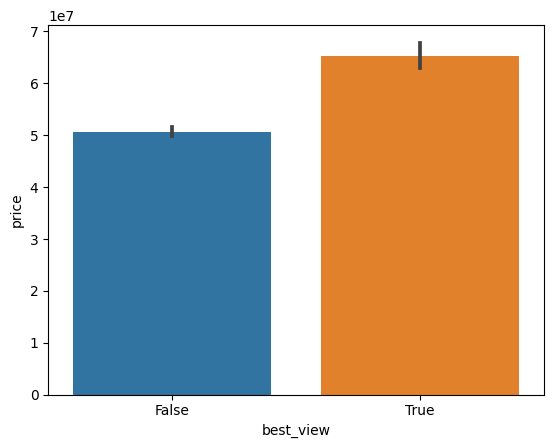

In [179]:
sns.barplot(x=df['best_view'], y=df['price'])


<AxesSubplot: xlabel='best_view', ylabel='price'>

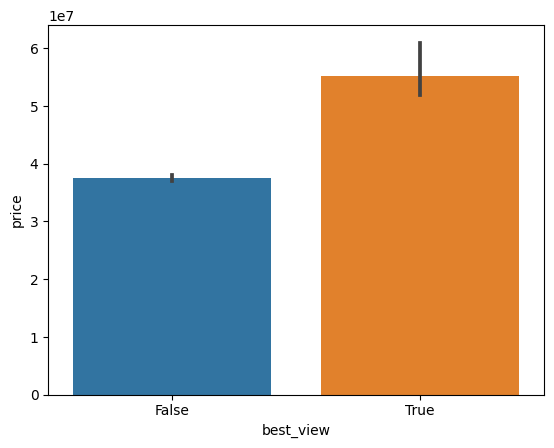

In [107]:
sns.barplot(x=df['best_view'], y=df['price'],estimator='median')


<AxesSubplot: xlabel='best_view', ylabel='price_per_m2'>

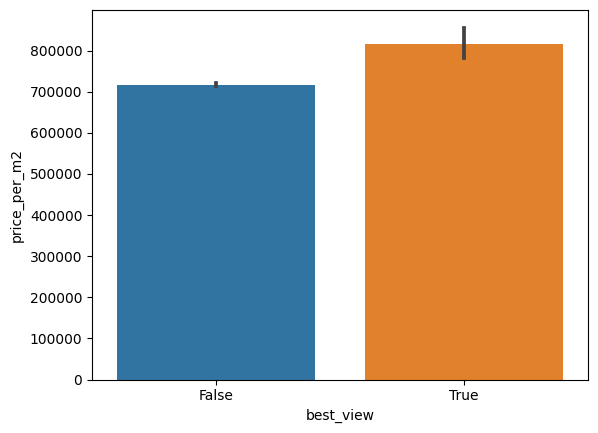

In [71]:
sns.barplot(x=df['best_view'], y=df['price_per_m2'])

In [83]:
df['seller'].value_counts()

Специалист             9770
Хозяин недвижимости    4709
Компания                494
Крыша Агент             467
Новостройка             411
Name: seller, dtype: int64

<AxesSubplot: xlabel='best_view', ylabel='price'>

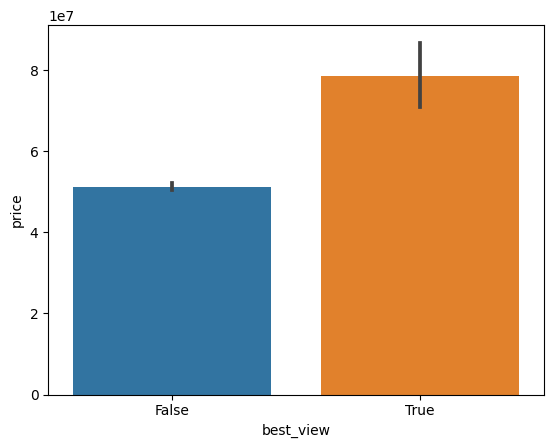

In [108]:
sns.barplot(x=df[df['seller']!='Новостройка']['best_view'], y=df[df['seller']!='Новостройка']['price'])

[Text(0, 0, '13.4362'), Text(0, 0, '13.5408')]

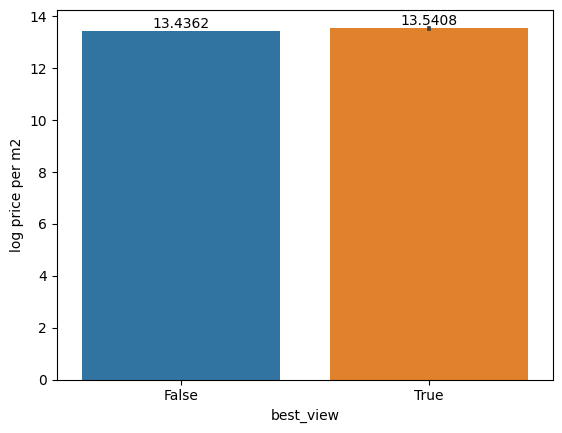

In [109]:
ax = sns.barplot(x=df['best_view'], y=np.log(df['price_per_m2']))
plt.ylabel('log price per m2')
ax.bar_label(ax.containers[0])

<AxesSubplot: xlabel='price', ylabel='Count'>

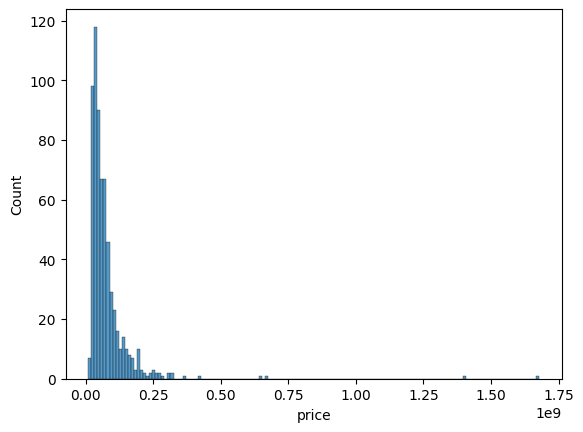

In [110]:
sns.histplot(df[df['best_view']]['price'])

<AxesSubplot: xlabel='price', ylabel='Count'>

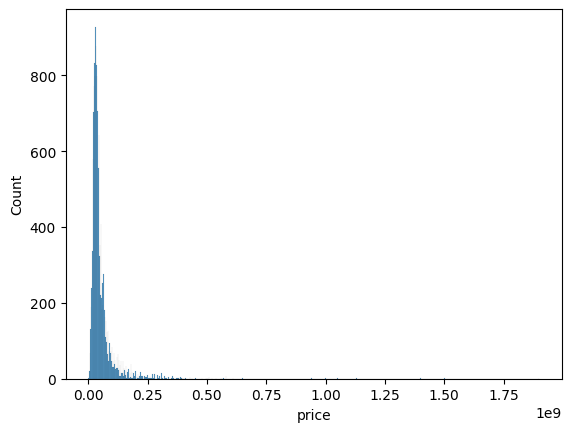

In [111]:
sns.histplot(df[~df['best_view']]['price'])

Прикольный анализ конструкторного вариабла в виде апроксимации красивого вида 

Text(0, 0.5, 'price in tg')

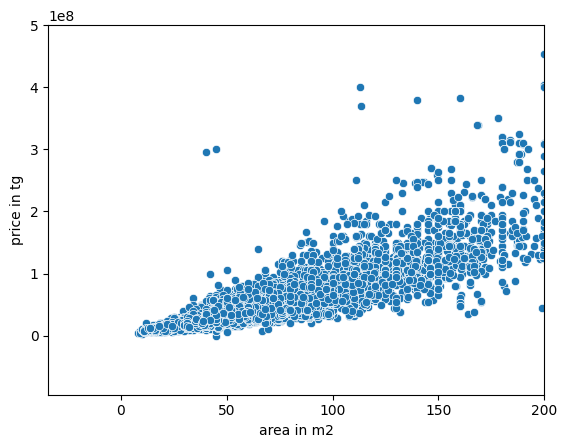

In [16]:
sns.scatterplot(x=df['area'],y=df['price'])
plt.xlim(right  =200)
plt.ylim(top=0.5*1e9)

plt.xlabel('area in m2')
plt.ylabel('price in tg')

Причины уничтожения площади - хетероскедастисити и очевидность

In [197]:
def get_price_of_neigbours(row, n_neighbors=1):
    neibgours = get_neigbours(row, n_neighbors)
    return np.log(neibgours['price']/neibgours['Area']).max()
    

In [198]:
df['neigbour_price'] = df.apply(lambda x: get_price_of_neigbours(x), axis=1)

Text(0, 0.5, 'log price per m2')

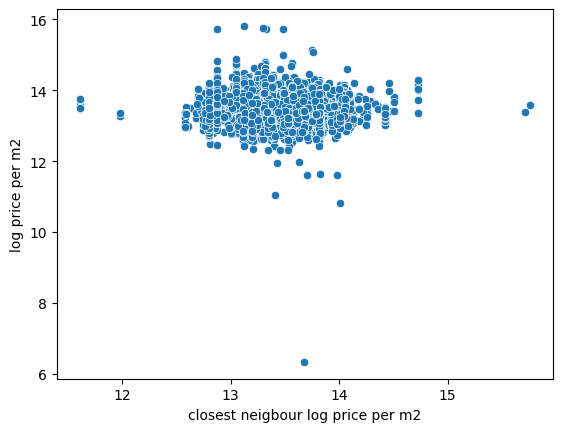

In [199]:
sns.scatterplot(x=df['neigbour_price'], y=df['log_price_per_m2'])
plt.xlabel('closest neigbour log price per m2')
plt.ylabel('log price per m2')

In [180]:
df['log_price_per_m2'] = np.log(df['price_per_m2'])

(12.0, 15.0)

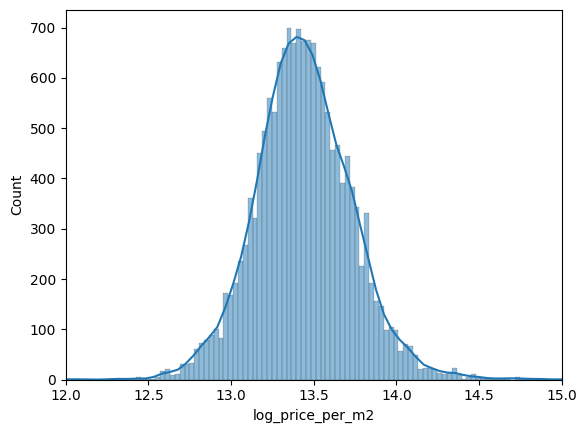

In [139]:
sns.histplot(df['log_price_per_m2'],kde=True)
plt.xlim((12,15))

In [133]:
from scipy.stats import shapiro

In [138]:
shapiro(df['log_price_per_m2'])

ShapiroResult(statistic=0.9569748640060425, pvalue=0.0)

<AxesSubplot: xlabel='floor', ylabel='Count'>

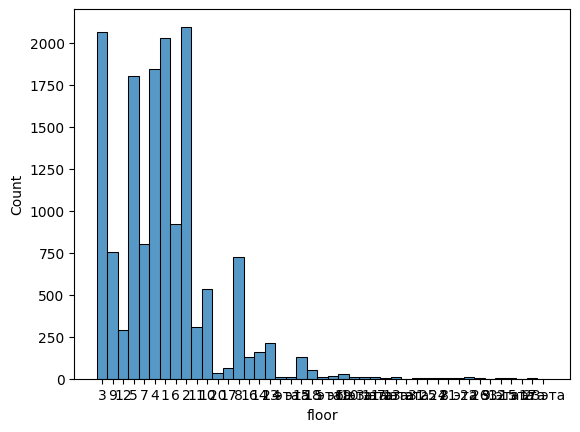

In [140]:
sns.histplot(df['floor'])

In [159]:
df = pd.read_excel('./data/data2023.xlsx')

<AxesSubplot: xlabel='floor', ylabel='price'>

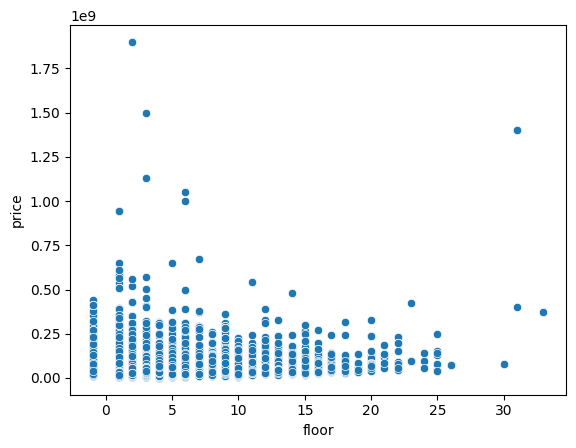

In [166]:
sns.scatterplot(x=df['floor'], y=df['price'])

<AxesSubplot: xlabel='total_floors', ylabel='price'>

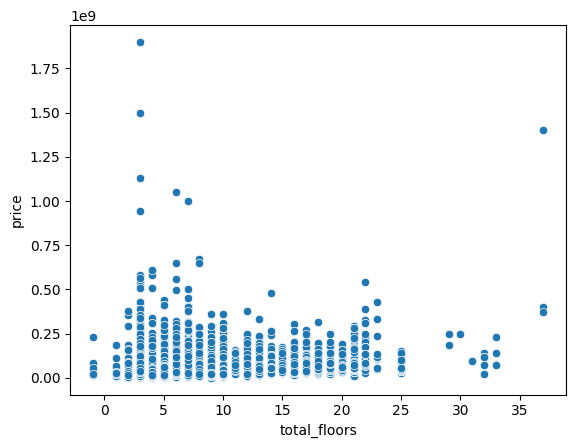

In [171]:
sns.scatterplot(x=df['total_floors'], y=df['price'])

In [172]:
from sklearn.linear_model import LinearRegression

In [181]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'cv ', 'prime_key', 'krisha_id', 'price',
       'description', 'is_mortgaged', 'seller', 'city', 'date_creation',
       'num_views', 'is_hot', 'is_paid_up', 'is_hyped_turbo', 'is_cold_entry',
       'num_pictures', 'num_rooms', 'Area', 'floor', 'total_floors',
       'year_builded', 'ceiling_height', 'Region', 'Address', 'Price per Area',
       'f/tf', 'Full Address', 'Latitude', 'Longitude', 'neigbour_price',
       'price_per_m2', 'best_view', 'log_price_per_m2'],
      dtype='object')

In [185]:
LinearRegression().fit(df[['floor','neigbour_price']], df['log_price_per_m2']).score(df[['floor','neigbour_price']], df['log_price_per_m2'])

0.014970755201928365